In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import exp, sqrt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

%matplotlib inline




Bad key "text.kerning_factor" on line 4 in
/home/eric/miniconda3/envs/geo_test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('2019-ncov.csv',index_col=0)

# filling missing date by taking average of the previous and preceding dates
for country in df.columns:
    df[country]['2020-01-22'] = (df[country]['2020-01-21'] + df[country]['2020-01-23'])/2

df['Total_no_china'] = df.loc[:,df.columns != 'China'].sum(axis=1)
df['Total'] = df.loc[:,df.columns != 'Total_no_china'].sum(axis=1)


In [3]:
# getting density data from wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density'
all_tables = pd.read_html(url)

# grabbing relevant table
pop_table = all_tables[0][['Country (or dependent territory)','Area','Population']]

# grabbing relevant columns from table
a = pop_table['Country (or dependent territory)']['Country (or dependent territory)']
b = pop_table['Area']['km2']
c = pop_table['Population']['Population']

# merging into dataframe
frame = {'country':a,'area':b,'population':c}
pop_table_2 = pd.DataFrame(frame)

# removing unwanted data
pop_table_2.drop(pop_table_2.index[[0,1,2,-1,-2]], inplace=True)
pop_table_2.reset_index(inplace=True,drop = True)

# resetting column types
pop_table_2['area'] = pop_table_2['area'].astype(float)
pop_table_2['population'] = pop_table_2['population'].astype(float)

pop_table_2['density'] = pop_table_2['population']/pop_table_2['area']
pop_table_2.sort_values('country', inplace=True)

pop_table_2 = pop_table_2.replace('Faroe Islands (Denmark)', 'Faroe Islands')
pop_table_2 = pop_table_2.replace('French Guiana (France)', 'French Guiana')
pop_table_2 = pop_table_2.replace('Gibraltar (UK)[note 1]', 'Gibraltar')
pop_table_2 = pop_table_2.replace('Guernsey (Crown dependency)', 'Guernsey')
pop_table_2 = pop_table_2.replace('Vatican City', 'Holy See')
pop_table_2 = pop_table_2.replace('Martinique (France)', 'Martinique')
pop_table_2 = pop_table_2.replace('Russia[note 6]', 'Russia')
pop_table_2 = pop_table_2.replace('Saint Martin (France)', 'Saint Martin')
pop_table_2 = pop_table_2.replace('Saint Barthelemy (France)', 'Saint Barthelemy')
pop_table_2 = pop_table_2.replace('Ukraine [note 4]', 'Ukraine')
pop_table_2 = pop_table_2.replace('French Polynesia (France)', 'French Polynesia')
pop_table_2 = pop_table_2.replace('Democratic Republic of the Congo', 'Congo')
pop_table_2 = pop_table_2.replace('Cayman Islands (UK)', 'Cayman Islands')
pop_table_2 = pop_table_2.replace('Guadeloupe (France)', 'Guadeloupe')
pop_table_2 = pop_table_2.replace('Jersey (Crown dependency)', 'Jersey')
pop_table_2 = pop_table_2.replace('Puerto Rico (US)', 'Puerto Rico')
pop_table_2 = pop_table_2.replace('Reunion (France)', 'Reunion')
pop_table_2 = pop_table_2.replace('Saint Vincent and the Grenadines', 'Saint Vincent')


# fixing the UK...

uk_countries = ['Wales', 'England','Northern Ireland', 'Scotland']
uk_subset = pop_table_2[pop_table_2['country'].isin(uk_countries)]
uk_row = [['United Kingdom',uk_subset['area'].sum(), uk_subset['population'].sum(), uk_subset['density'].sum()]]
columns = uk_subset.columns
uk_row = pd.DataFrame(uk_row, columns=columns)

pop_table_2 = pop_table_2.append(uk_row, ignore_index=True)
# pop_table_2

In [4]:
# checks if there are countries in the data that is not in wilipedia
pop_countries = [c for c in pop_table_2['country']]
data_countries = [c for c in list(df.columns[:-2])]
[print(c) for c in data_countries if c not in pop_countries]

# want to normalize based on density
dfdf = df[data_countries]
# for country in data_countries:
#     area_ = pop_table_2[pop_table_2['country']==country]['area']
#     density_ = pop_table_2[pop_table_2['country']==country]['density']
#     dfdf[country] = dfdf[country].apply(lambda x: (x / area_))


International


In [5]:
right = pop_table_2[['country','population']]
left = pd.DataFrame(dfdf.iloc[-1])
left.reset_index(inplace=True, drop=False)
left.rename(columns={'index':'country'}, inplace=True)

In [6]:
merged = pd.merge(left,right, how='inner', on='country')
merged['pop_log'] = np.log10(merged['population'])
merged['case_log'] = np.log10(merged['2020-03-14'])

/home/eric/miniconda3/envs/geo_test/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


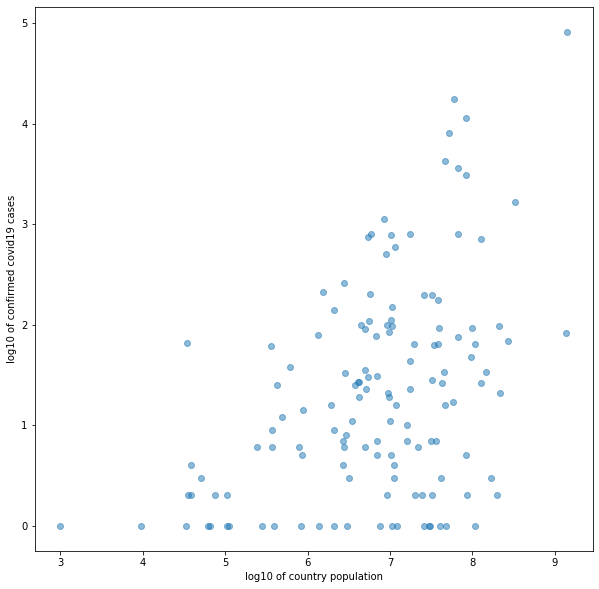

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x=merged['pop_log'],y=merged['case_log'], alpha = 0.5)
plt.xlabel('log10 of country population')
plt.ylabel('log10 of confirmed covid19 cases')
plt.show()

In [8]:
#checks if new countries have been added
# for country in df.columns:
#     if df.iloc[-2][country] == 0:
#         print(country)